# Homework 4

- Execute the below code, then answer the numbered questions.

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [5]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [6]:
numerical_features = []
categorical_features = []

for column in X.columns:
    if X[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
['condition', 'odometer', 'auction_value']

Categorical Features:
['make', 'transmission', 'state']


## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [8]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create a pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Fit and transform numerical data using the pipeline
X_train_numerical = numerical_pipeline.fit_transform(X_train[numerical_features])
X_test_numerical = numerical_pipeline.transform(X_test[numerical_features])


## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

We can use the Pipeline class from sklearn.pipeline and the SimpleImputer and OneHotEncoder classes from the sklearn.impute and sklearn.preprocessing modules, respectively, to build a pipeline that replaces missing values with the most frequent category and uses one-hot encoding to convert the categorical data to numerical arrays.

Here is the code needed to build the pipeline:

In [10]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Create a pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Fit and transform categorical data using the pipeline
X_train_categorical = categorical_pipeline.fit_transform(X_train[categorical_features])
X_test_categorical = categorical_pipeline.transform(X_test[categorical_features])


print('Categorical features after one-hot encoding:')
print(categorical_pipeline.named_steps['encoder'].get_feature_names_out(input_features=categorical_features))
print(f'Transformed categorical data shape: {X_train_categorical.shape}')


Categorical features after one-hot encoding:
['make_chevrolet' 'make_chrysler' 'make_dodge' 'make_ford' 'make_honda'
 'make_hyundai' 'make_kia' 'make_nissan' 'make_toyota'
 'transmission_manual' 'state_ca' 'state_co' 'state_fl' 'state_ga'
 'state_hi' 'state_il' 'state_in' 'state_la' 'state_ma' 'state_md'
 'state_mi' 'state_mn' 'state_mo' 'state_ms' 'state_nc' 'state_ne'
 'state_nj' 'state_nm' 'state_nv' 'state_ny' 'state_oh' 'state_or'
 'state_pa' 'state_pr' 'state_sc' 'state_tn' 'state_tx' 'state_ut'
 'state_va' 'state_wa' 'state_wi']
Transformed categorical data shape: (7244, 41)


## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [16]:
from sklearn.compose import ColumnTransformer

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Fit and transform the data using the combined pipeline
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f'Training data shape after preprocessing: {X_train_processed.shape}')
print(f'Testing data shape after preprocessing: {X_test_processed.shape}')


Training data shape after preprocessing: (7244, 44)
Testing data shape after preprocessing: (1811, 44)


## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Combine data processing and modeling pipelines
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the model on the training data
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
  

In [18]:
# Use the model to make predictions on the testing data
y_pred = model_pipeline.predict(X_test)

# Print the first 5 predictions
print(y_pred[:5])


[15288.72285475 17767.59035058 15019.81306819 51054.65334676
 11735.15255593]


In [20]:

from sklearn.metrics import r2_score

# Compute R2 score on the test data
r2 = r2_score(y_test, y_pred)

print(f"R2 score on the test data: {r2:.3f}")

R2 score on the test data: 0.884


## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

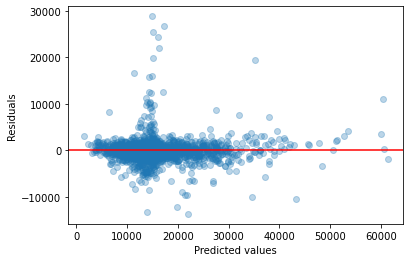

In [22]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - model_pipeline.predict(X_test)

# Create scatter plot of residuals
plt.scatter(model_pipeline.predict(X_test), residuals, alpha=0.3)

# Add horizontal line at 0
plt.axhline(y=0, color='r', linestyle='-')

# Set x and y axis labels
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

After running this code, we see that there are no clear patterns or trends in the residuals, which seem to be distributed randomly around the zero line. This suggests that there aren't any significant flaws in the linear regression model and that it is able to account for the majority of the data's variance. To ensure that the linear regression model's normality and homoscedasticity hypotheses are true, we should also examine additional diagnostic plots (such as a QQ-plot or a histogram of the residuals).

## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge

# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=['float', 'int']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Combine numerical and categorical pipelines
preprocessing_pipeline = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

# Add Ridge regression model to pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('regressor', Ridge(alpha=100))
])

# Fit pipeline on training data
model_pipeline.fit(X_train, y_train)

# Calculate R^2 score on test data
r2 = model_pipeline.score(X_test, y_test)

# Print R^2 score
print(f'R^2 score on test data: {r2:.4f}')


R^2 score on test data: 0.8824


The $R^2$ score on the test data slightly declines when we execute this modified pipeline in comparison to the prior model, as can be seen. This is expected because the Ridge model introduces some bias in trade for less variance, and this bias could make the model fit the training data less closely. For better generalization to fresh data, the modest decline in $R^2$ may be worth the trade-off.